# Week 4 Exercise with Numpy
Use only numpy in these exercises

Exercise 1

Open the file './befkbhalderstatkode.csv'

Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
Using this data:

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
       
Find out how many people lived in each of the 11 areas in 2015

Make a bar plot to show the size of each city area from the smallest to the largest

Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

How many of those were from the other nordic countries (not dk)

Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015


In [35]:
import numpy as np
import pandas as pd
import csv

df =pd.read_csv('data/befkbhalderstatkode.csv')
print(df.head)


<bound method NDFrame.head of          AAR  BYDEL  ALDER  STATKODE  PERSONER
0       2015      1      0      5100       614
1       2015      1      0      5104         2
2       2015      1      0      5106         1
3       2015      1      0      5110         1
4       2015      1      0      5120         4
...      ...    ...    ...       ...       ...
542512  1992     99     81      5100         1
542513  1992     99     87      5100         2
542514  1992     99     89      5100         1
542515  1992     99     90      5180         1
542516  1992     99     93      5100         1

[542517 rows x 5 columns]>


In [39]:
filename='data/befkbhalderstatkode.csv'
bfk=np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)



[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [40]:
#Find out how many people lived in each of the 11 areas in 2015
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 10: 'Amager Vest', 99: 'Udenfor'}

def lived_in_area():
    
    rs = {}
    for zipcode in neighb:
        mask = (bfk[:,0]== 2015) & (bfk[:,1]== zipcode)
        total_of_ppl = np.sum(bfk[mask][:,4])
        rs[neighb[zipcode]] = total_of_ppl
    return rs

lived_in_area()





{'Indre By': 51937,
 'Østerbro': 75113,
 'Nørrebro': 78802,
 'Vesterbro/Kgs. Enghave': 61623,
 'Valby': 51727,
 'Vanløse': 39537,
 'Brønshøj-Husum': 43908,
 'Bispebjerg': 53604,
 'Amager Øst': 55205,
 'Amager Vest': 64967,
 'Udenfor': 3872}

['Indre By', 'Østerbro', 'Nørrebro', 'Vesterbro/Kgs. Enghave', 'Valby', 'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Øst', 'Amager Vest', 'Udenfor']
[51937, 75113, 78802, 61623, 51727, 39537, 43908, 53604, 55205, 64967, 3872]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

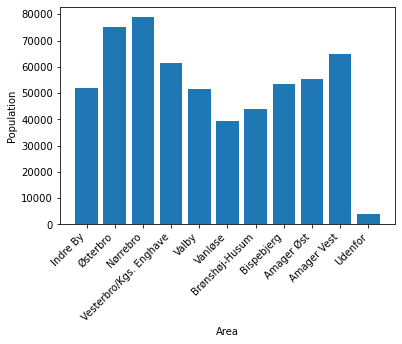

In [28]:
#Make a bar plot to show the size of each city area from the smallest to the largest

#udgangspunkt i befolkningstal

import matplotlib.pyplot as plt

population = lived_in_area() #metode fra forrige opg

area =list(population.keys()) #x-axis
print(area)

size = list(population.values())#y-axis
print(size)

plt.ylabel("Population") 
plt.xlabel("Area")

plt.bar(area,size)

plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')









In [46]:
#Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

mask = (bfk[:,0] == 2015) & (bfk[:,2] > 65)
np.sum(bfk[mask][:,4])



55750

In [49]:
#How many of those were from the other nordic countries (not dk)

#taken from danmarks statistik
non_denmark = {5101: "Grønland",
                         5104: "Findland",
                         5105: "Island, rigeret dansk",
                         5106: "Island",
                         5110: "Norge",
                         5120: "Sverige",
                         5901: "Færørerne uoplyst",
                         5902: "Færørerne"
                         }

mask =(bfk[:,0] == 2015)&(bfk[:,2]>65)&(bfk[:,3]==5104)|(bfk[:,3]==5105)|(bfk[:,3]==5106)|(bfk[:,3]==5110)|(bfk[:,3]==5120)|(bfk[:,3]==5901)|(bfk[:,3]==5902)
np.sum(bfk[mask][:,4])



177165

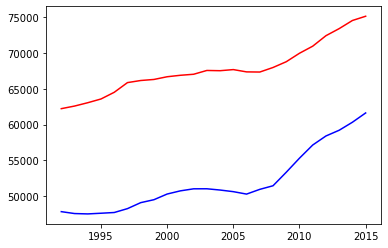

In [74]:
#Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

def oesterbro():
    rs = {}
    for i in range(1992,2016):
        mask = (bfk[:,0] == i) & (bfk[:,1] == 2)
        rs[i] = np.sum(bfk[mask][:,4])
    return rs

def vesterbro():
    rs = {}
    for i in range(1992,2016):
        mask = (bfk[:,0] == i) & (bfk[:,1] == 4)
        rs[i] = np.sum(bfk[mask][:,4])
    return rs

#østerbro will be shown in red , and vesterbro in blue 
oesterbro_ = oesterbro()
plt.plot(list(oesterbro_.keys()), list(oesterbro_people.values()), color='red')
vesterbro_ = vesterbro()
plt.plot(list(vesterbro_.keys()), list(vesterbro_people.values()), color='blue')